In [ ]:
!pip install mediapipe

In [ ]:
import mediapipe as mp
import cv2
from google.colab.patches import cv2_imshow
import glob
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import csv
import pickle
import os
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [23]:
image_path = '/content/drive/MyDrive/train1/angry/Training_1021836.jpg'
frame = cv2.imread(image_path)


In [24]:
folder_path = "/content/drive/MyDrive/train1/"
files = os.listdir(folder_path)
# print(files)

image_files = [f for f in files if f.lower().endswith(('.jpg', '.jpeg'))]
print(image_files)

# Display each image
for image_file in image_files:
    print(image_file)
    image_path = os.path.join(folder_path, image_file)
    img = cv2.imread(image_path)
    print('test2')
    if img is not None:
            # You can perform further processing with the image here
            # For example, display the image:
            cv2_imshow(f"Label: {label}, Image: {image_file}", img)
            cv2.waitKey(0)
            # print("test")
            cv2.destroyAllWindows()

[]


In [ ]:
folder_path = "/content/drive/MyDrive/train1/"
files = os.listdir(folder_path)

# Filter out only the image files
image_files = [f for f in files if f.lower().endswith(('.jpg', '.jpeg'))]
# Display each image
for image_files in files:
  print(image_files)
  image_file = os.path.join(folder_path, image_files)
  for images in os.listdir(image_file):
    # print(os.path.join(image_file,images))
    image_path = os.path.join(image_file,images)
    img = cv2.imread(image_path)
    # print(img)
    if img is not None:
      # You can perform further processing with the image here
      # For example, display the image:
      cv2_imshow(img)
      cv2.waitKey(0)
      cv2.destroyAllWindows()
    else:
        # If the image is None, remove it from the folder
        os.remove(image_path)
        print(f"Removed image: {images}")

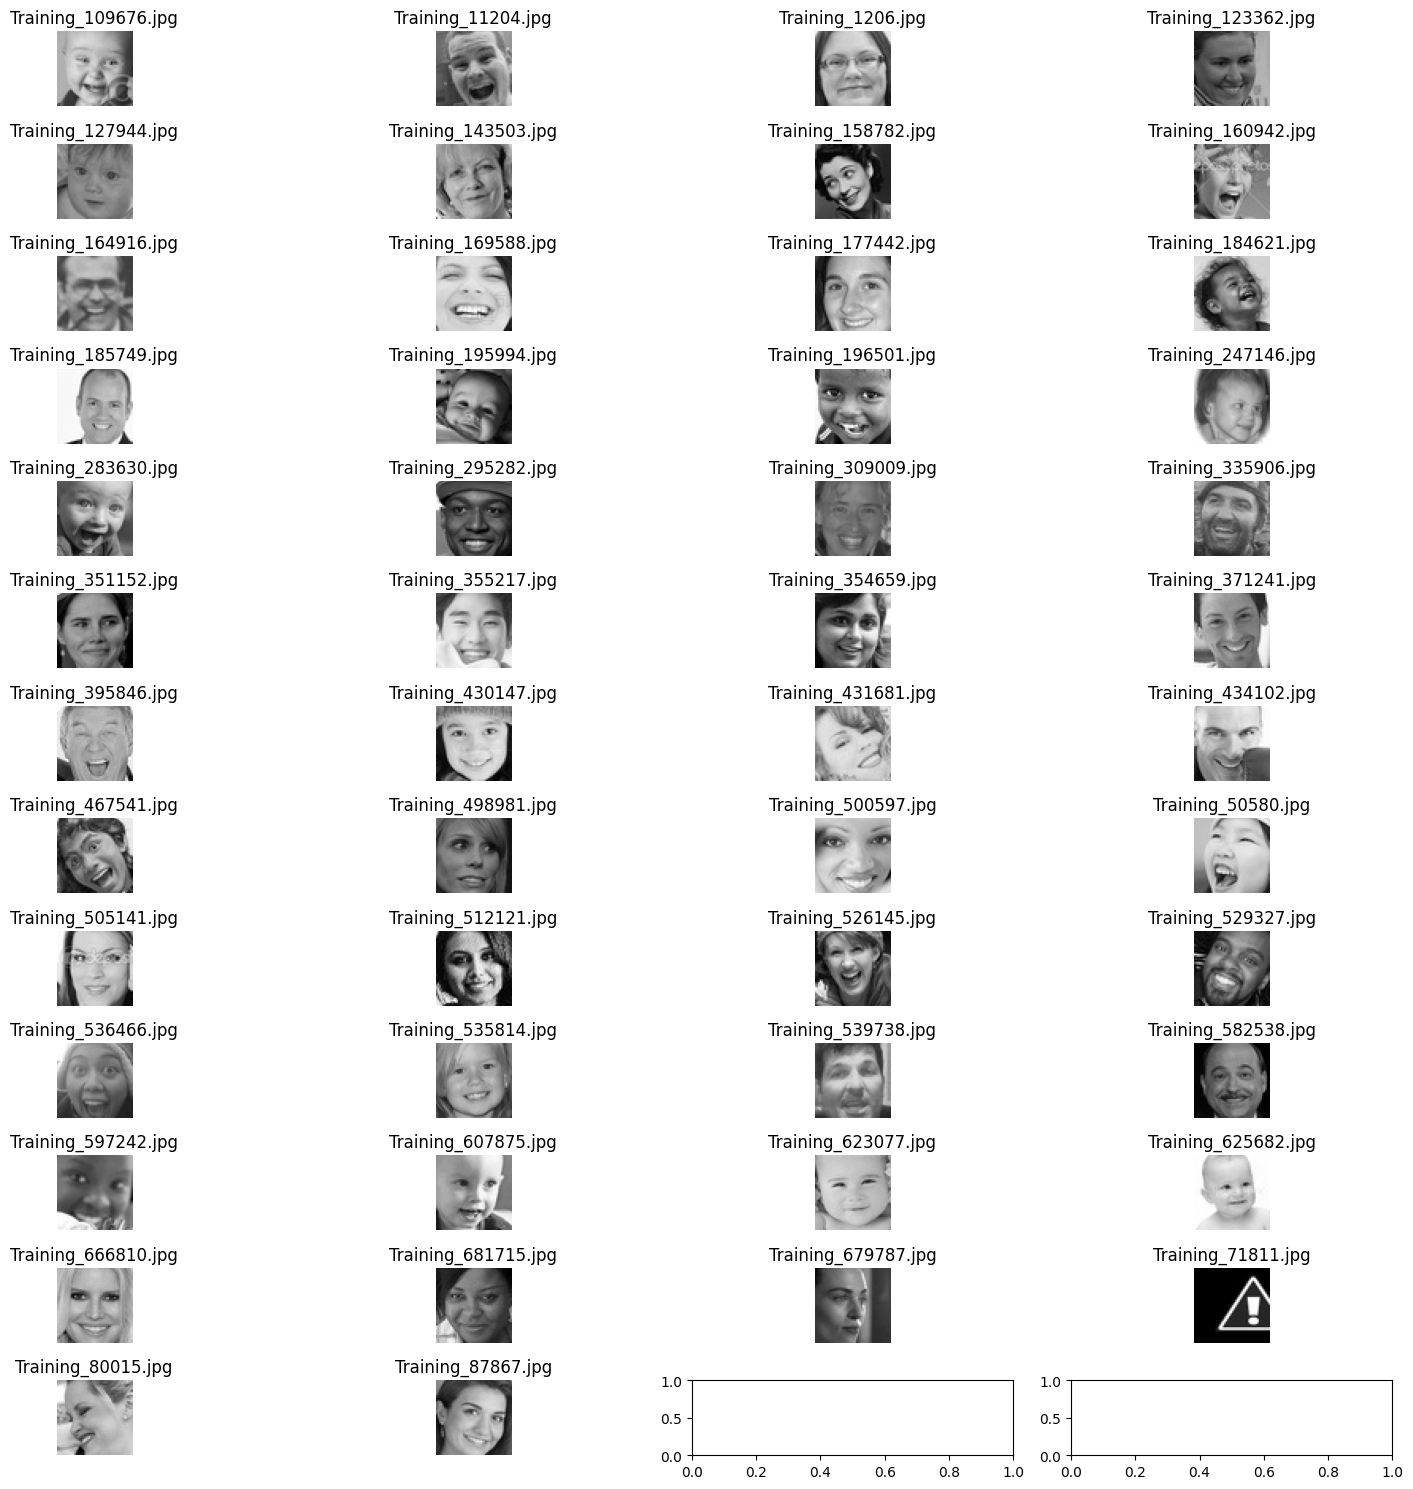

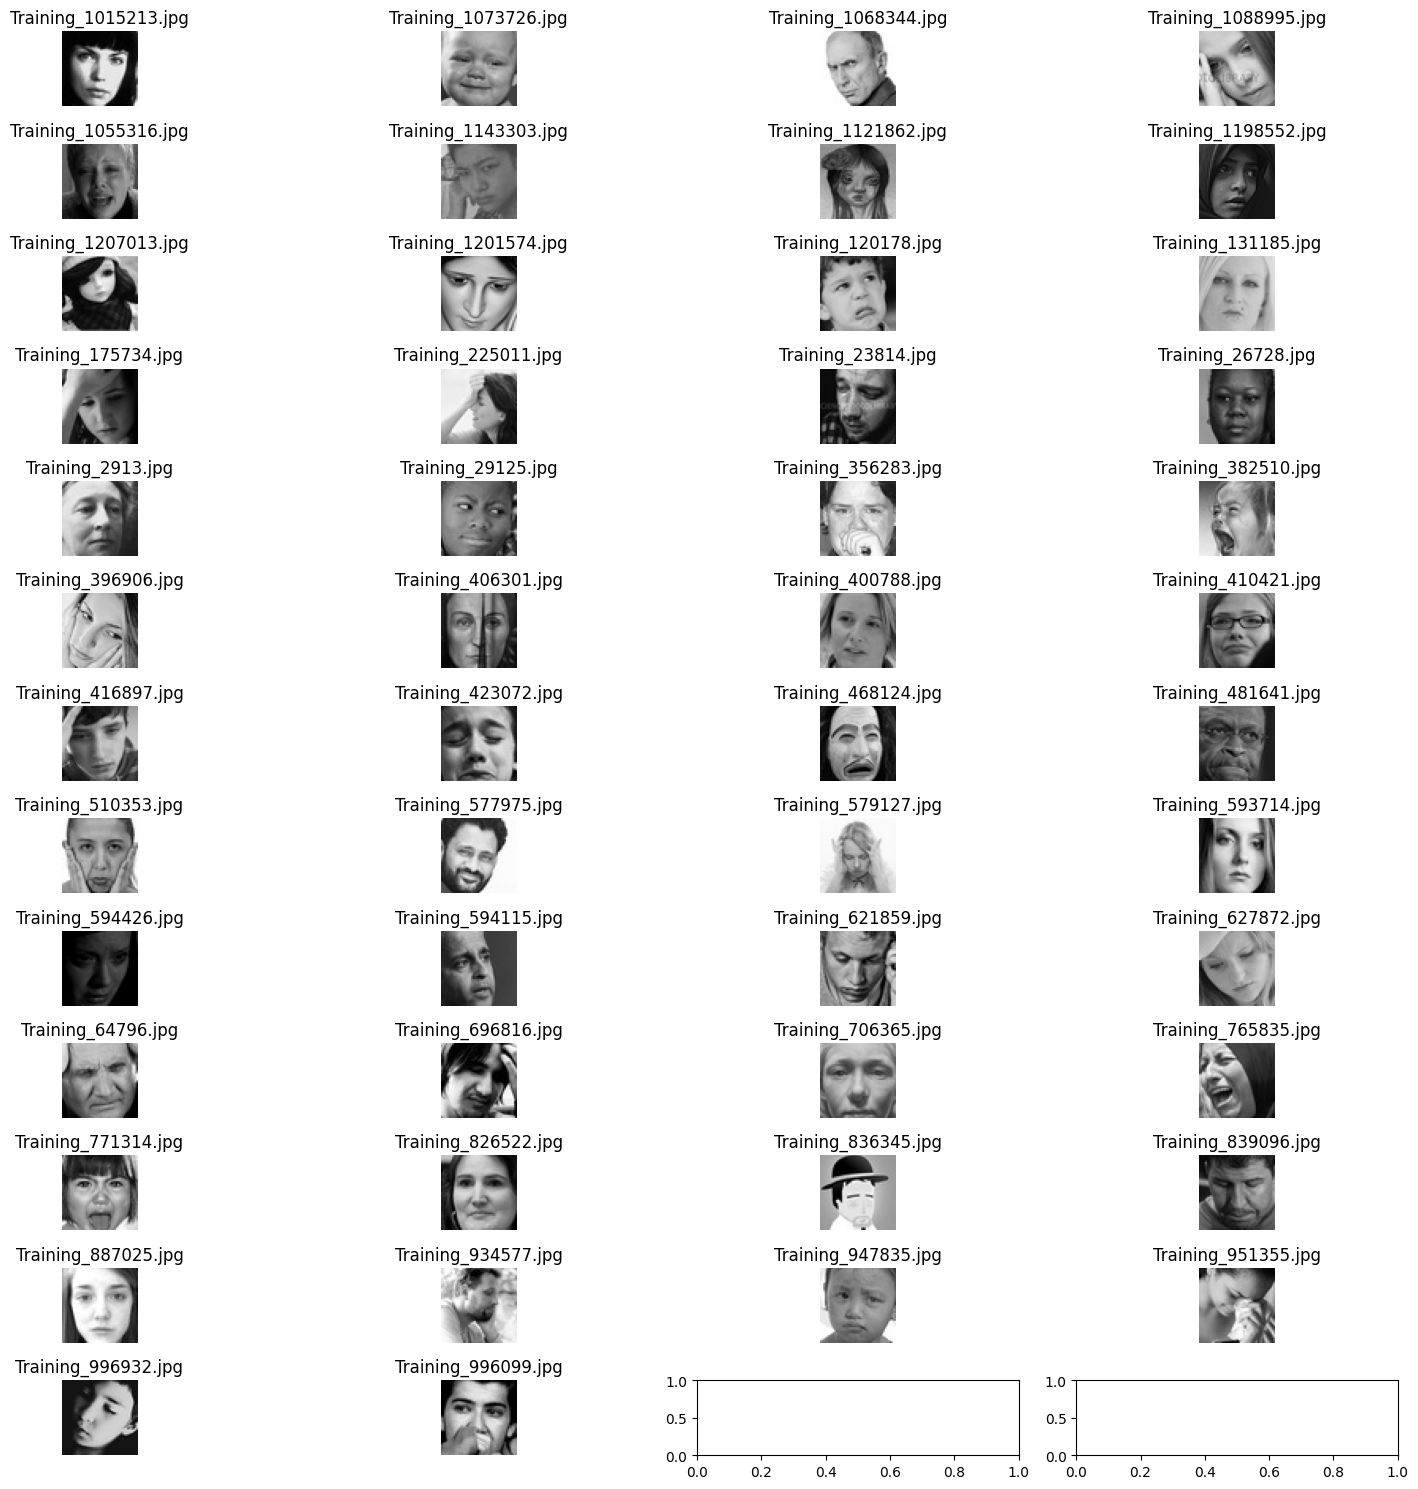

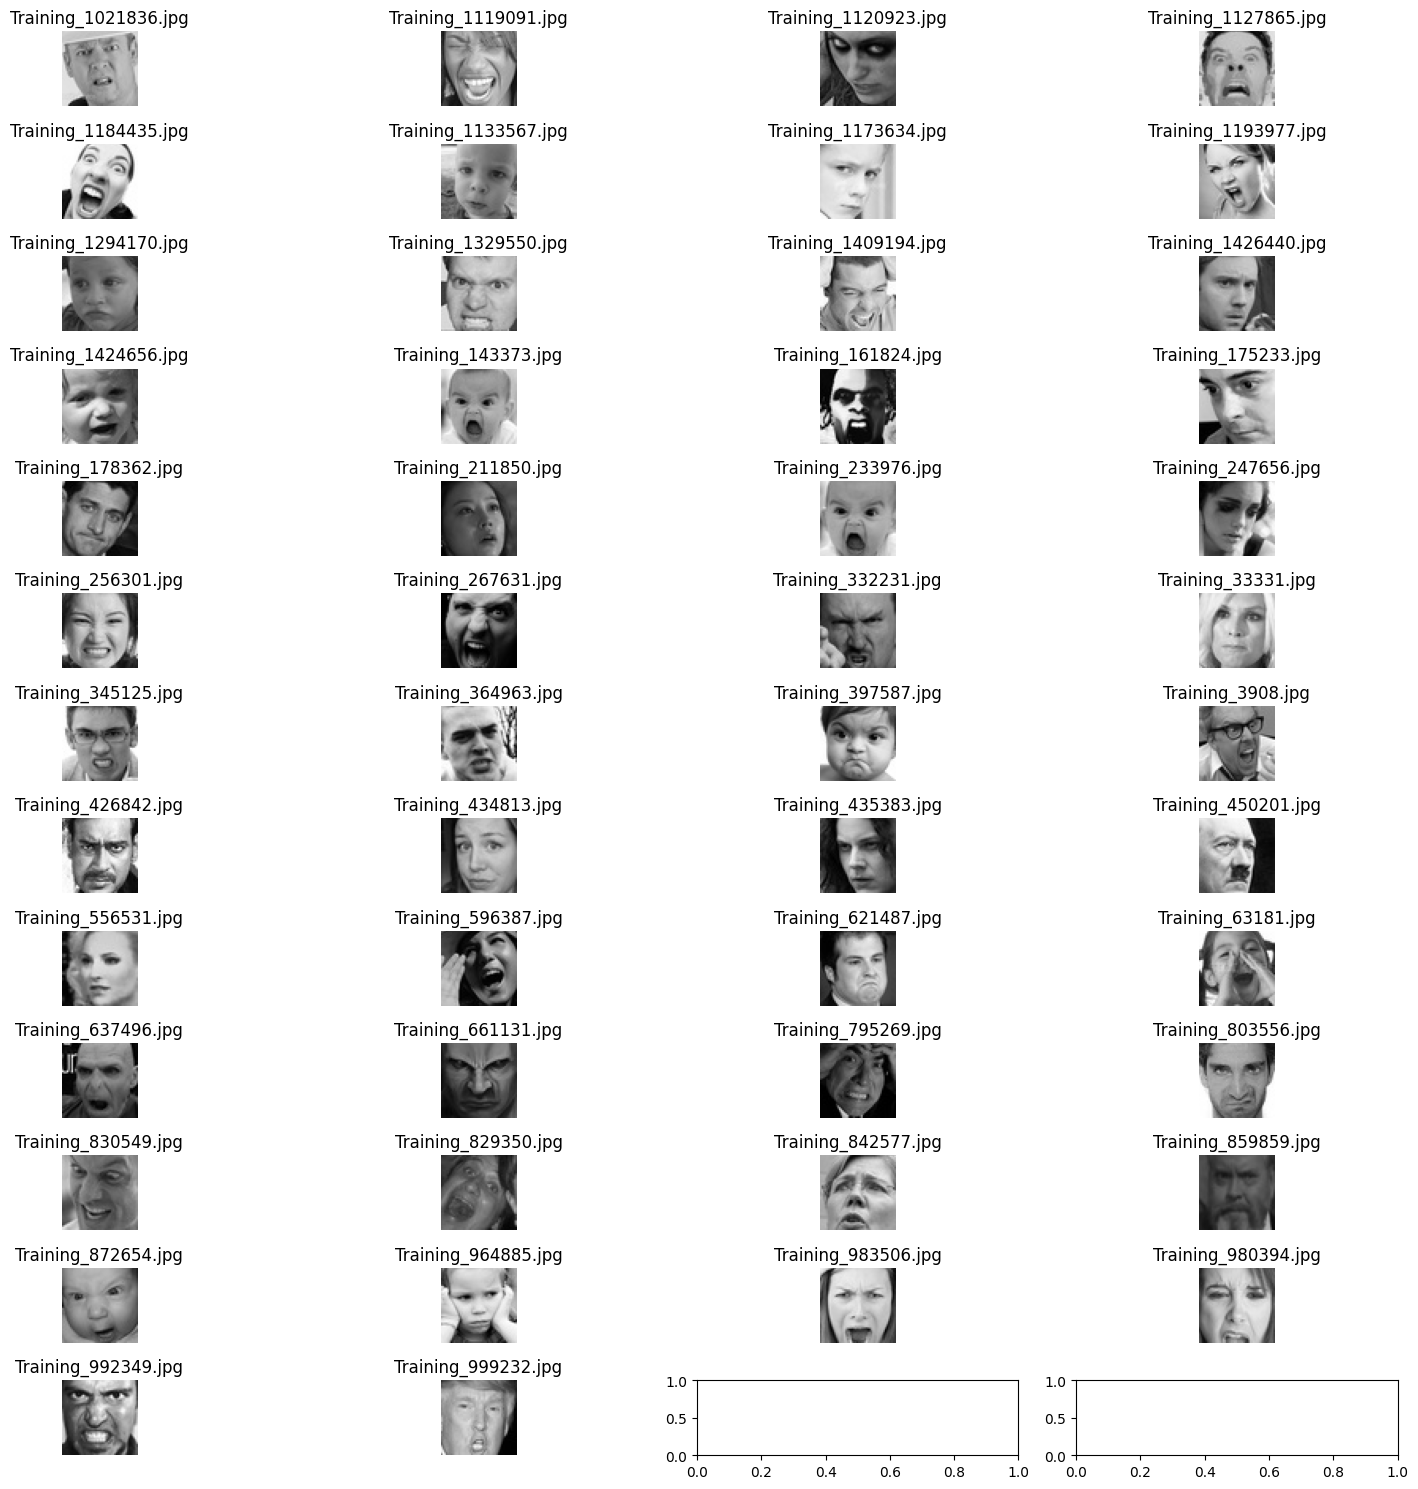

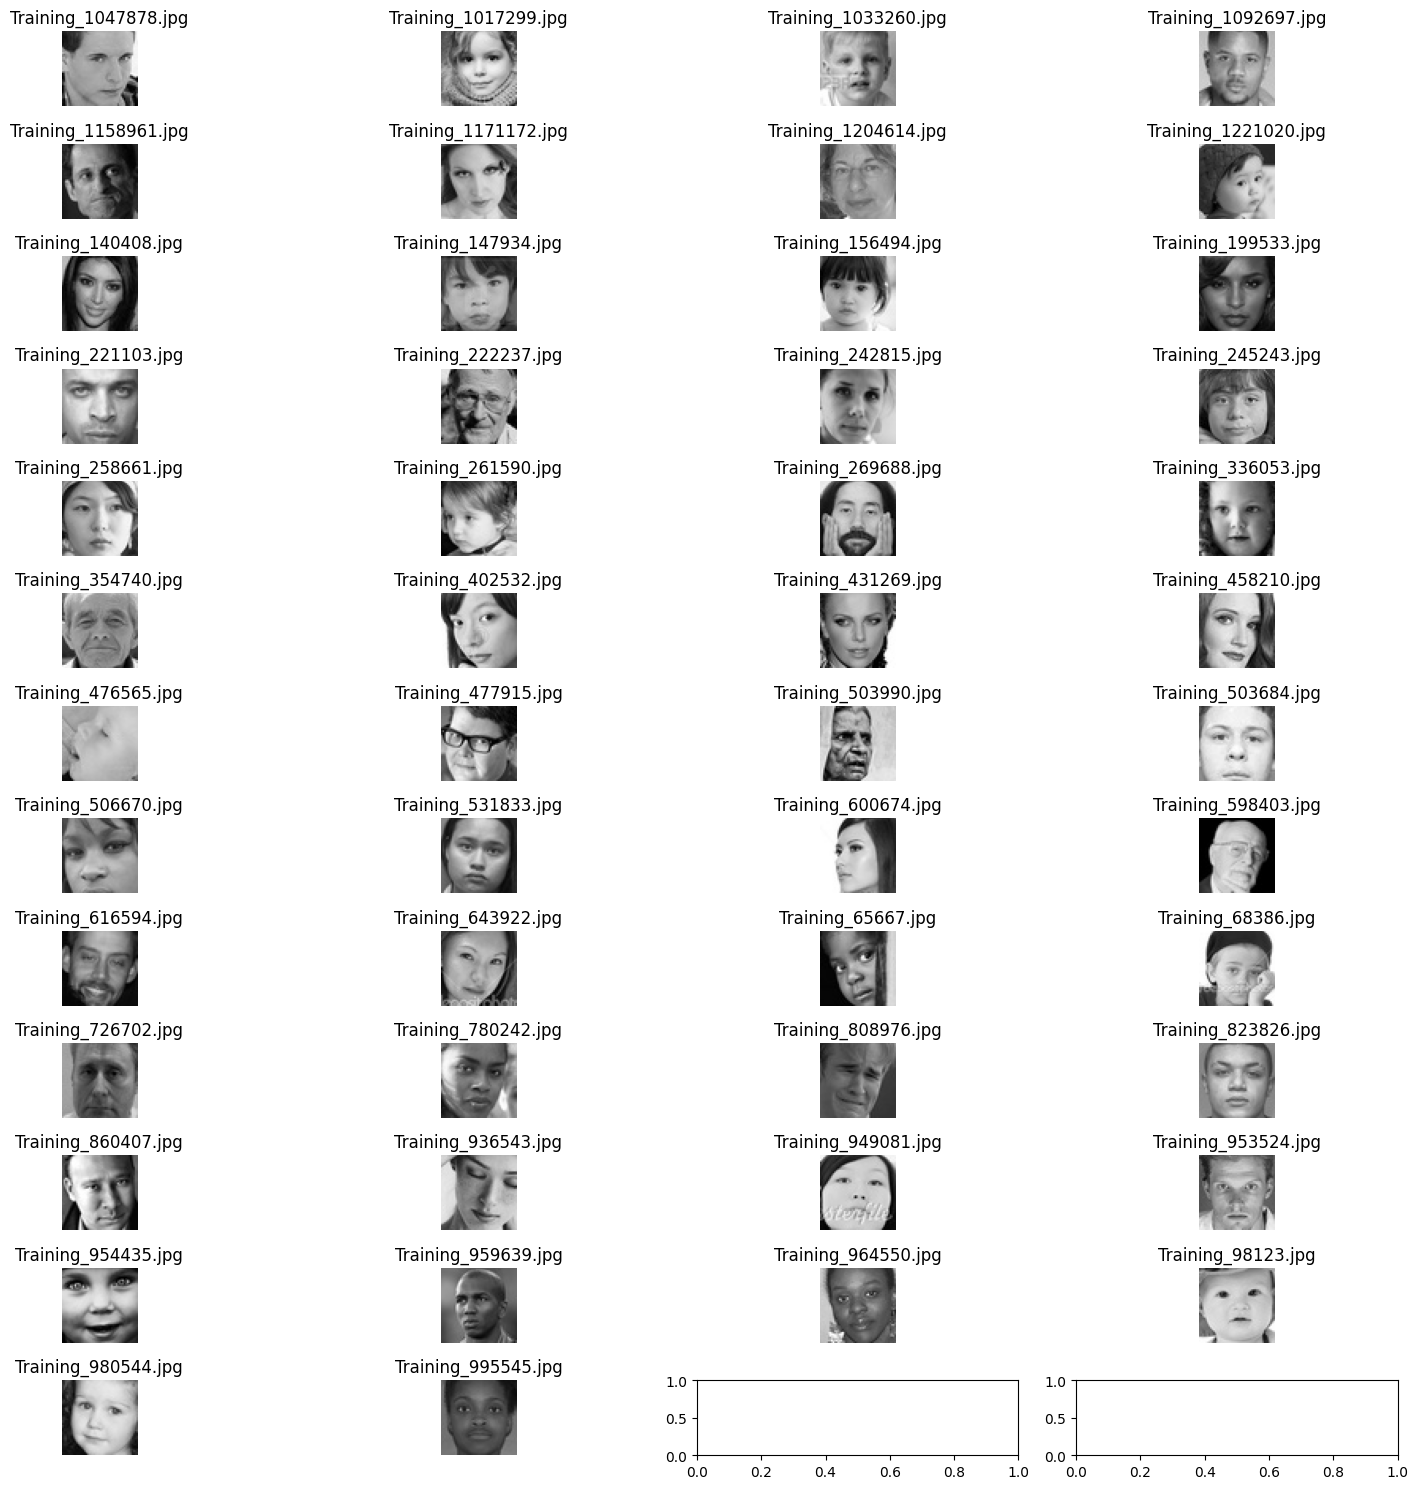

In [26]:
def display_images_in_array(folder_path, num_cols=4):
    # Get a list of all files in the specified folder
    files = os.listdir(folder_path)

    # Filter out only the image files
    image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    # Calculate the number of rows required
    num_images = len(image_files)
    num_rows = (num_images + num_cols - 1) // num_cols

    # Create a subplot grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

    # Display each image in the grid
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)
        img = cv2.imread(image_path)

        # Check if the image was successfully loaded
        if img is not None:
            # Determine the position in the grid
            row = i // num_cols
            col = i % num_cols

            # Display the image in the specified subplot
            axes[row, col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axes[row, col].set_title(image_file)
            axes[row, col].axis('off')

    # Adjust layout and display the grid
    plt.tight_layout()
    plt.show()

# Replace 'path/to/your/images' with the actual path to your image directory
images_dir = "/content/drive/MyDrive/train1/"

# Iterate through subdirectories (class labels) in the specified directory
for label in os.listdir(images_dir):
    subfolder_path = os.path.join(images_dir, label)

    # Call the display_images_in_array function for each subdirectory
    display_images_in_array(subfolder_path)

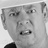

In [27]:
cv2_imshow(frame)

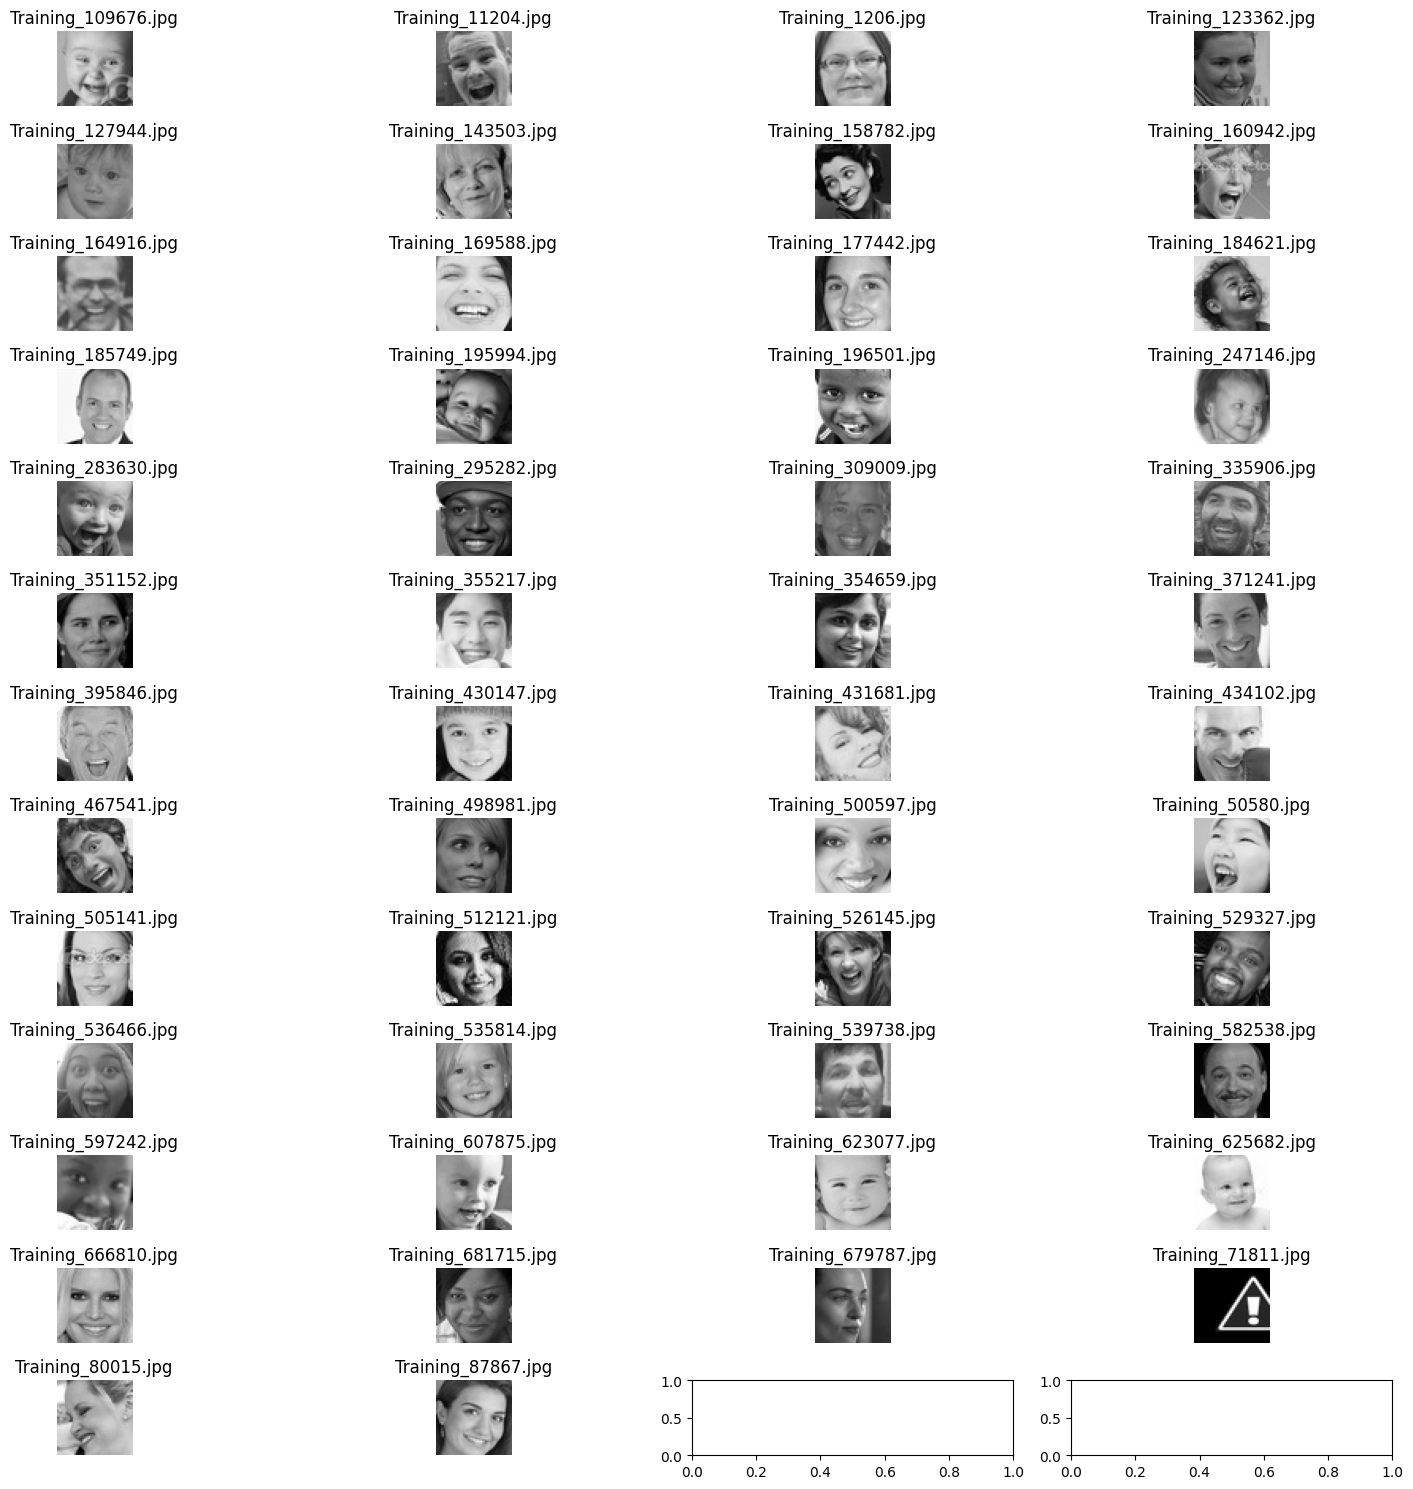

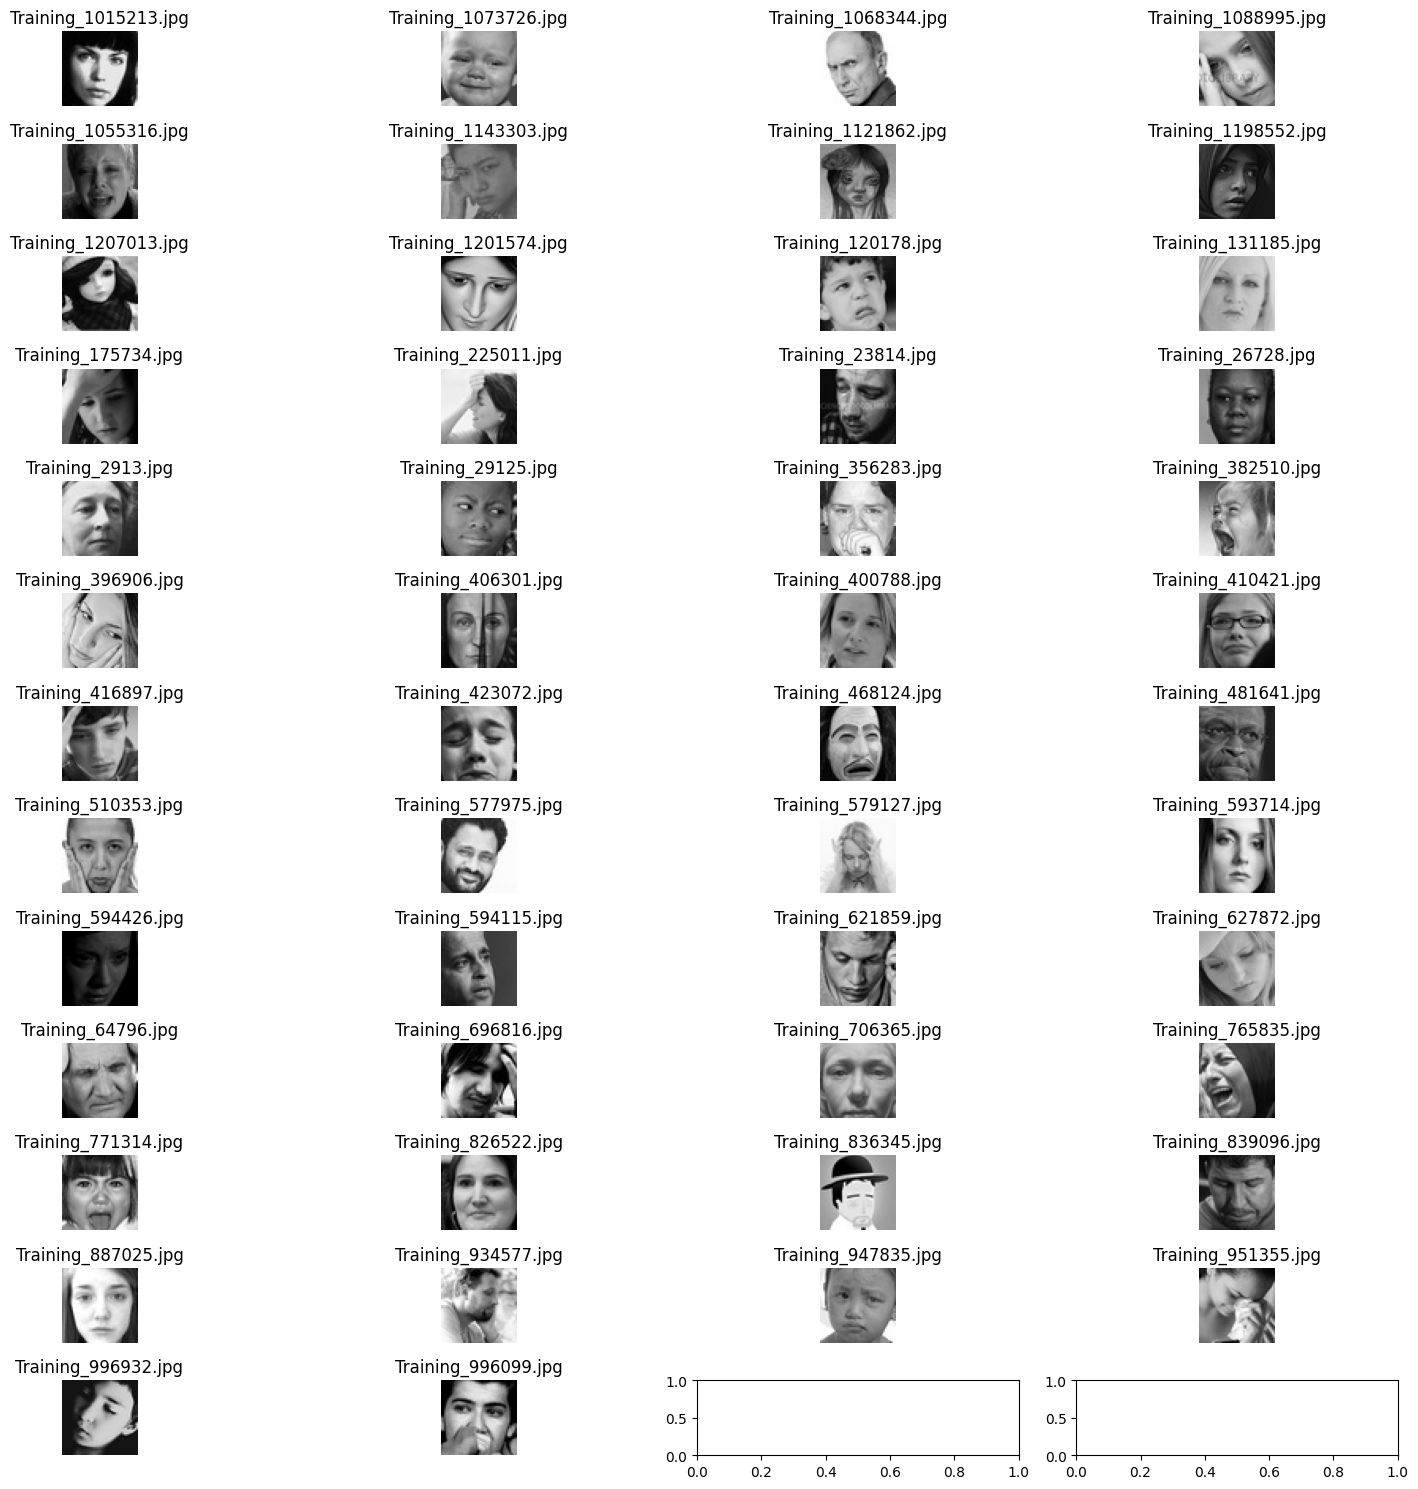

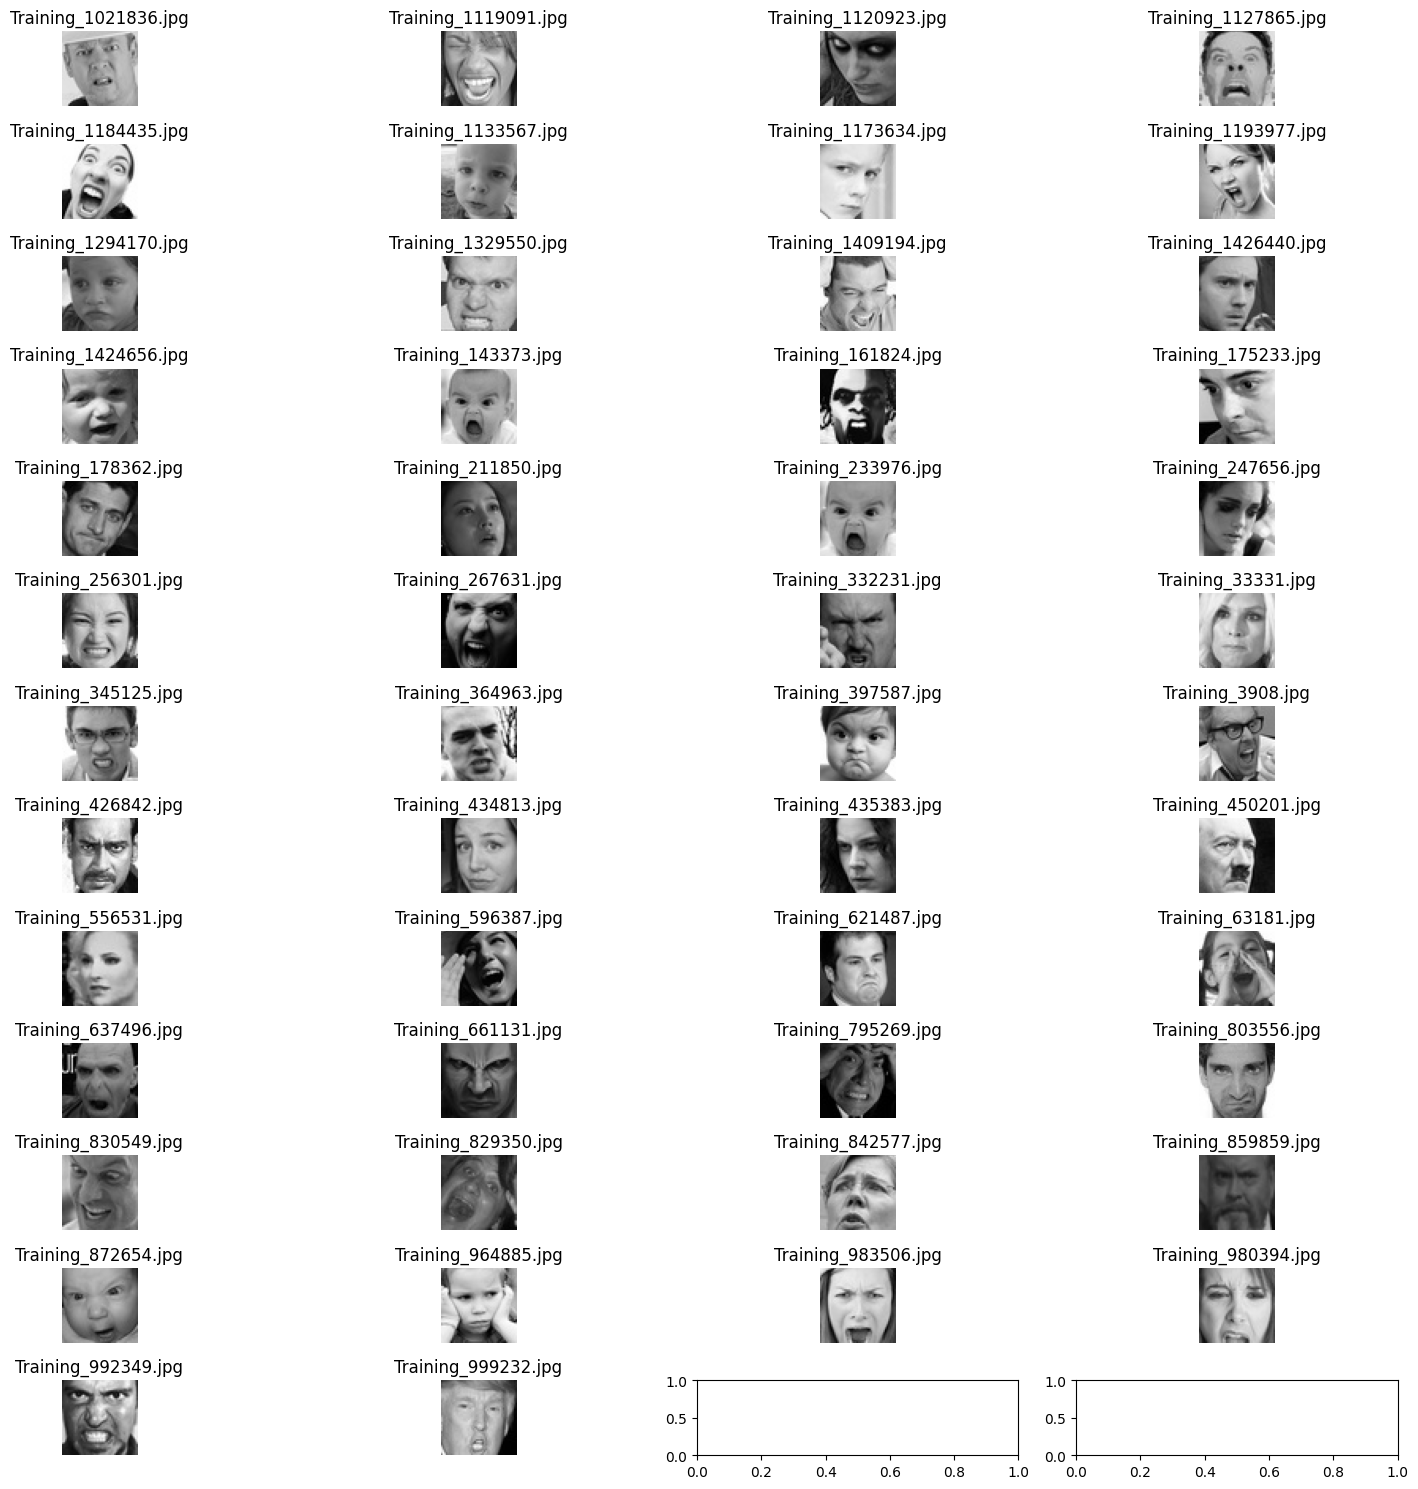

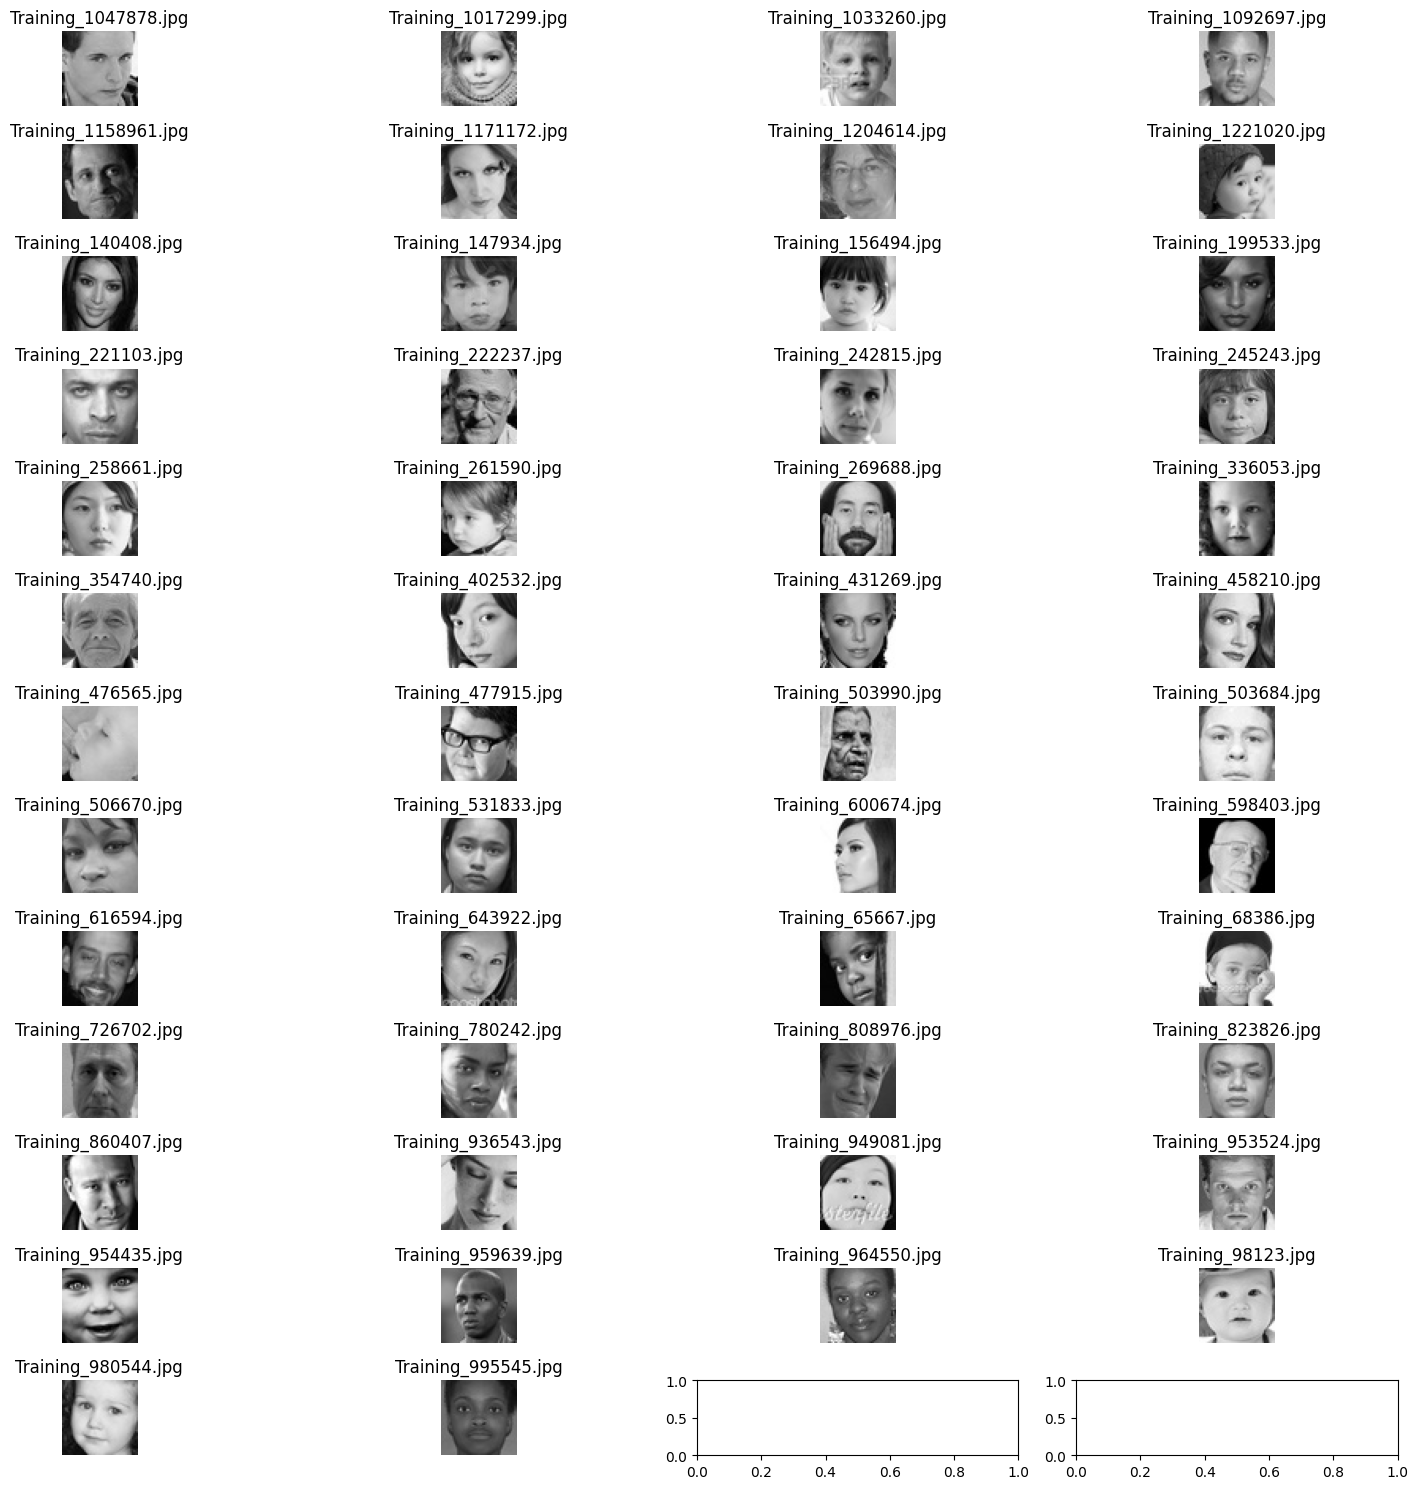

In [30]:
images_dir =  "/content/drive/MyDrive/train1/"
items = os.listdir(images_dir)
for label in os.listdir(images_dir):
  subfolder_path = os.path.join(images_dir, label)
  display_images_in_array(subfolder_path)

  files = os.listdir(images_dir)

  image_files = [f for f in files if f.lower().endswith(('.jpg', '.jpeg'))]

  # Display each image
  for image_file in image_files:
      image_path = os.path.join(images_dir, image_file)
      img = cv2.imread(image_path)

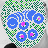

In [31]:
# Initiate the process
def get_landmarks(frame):
  with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
      # Recolor Feed BGR to RGB
      image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      image.flags.writeable = False

      # Make Detections
      results = holistic.process(image)
      # print(results)

      # Recolor image back to BGR
      image.flags.writeable = True
      image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

      # 1. Draw face landmarks
      mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1))

      # 2. Right hand
      mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2))

      # 3. Left Hand
      mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2))

      # 4. Pose Detections
      mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))
      # print(results)
      cv2_imshow(image)
      cv2.waitKey(0)

  cv2.destroyAllWindows()
  return results

results = get_landmarks(frame)
# results.pose_landmarks


In [32]:
num_landmarks = len(results.pose_landmarks.landmark)+len(results.face_landmarks.landmark)
landmarks = ['class']
for i in range(1, num_landmarks+1):
    landmarks += ['x{}'.format(i),'y{}'.format(i),'z{}'.format(i),'v{}'.format(i)]

In [33]:
#writing the landmarks into a csv file
with open('coords.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [34]:
def get_features(frame,class_name):
  with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # Recolor Feed
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False

    # Make Detections
    results = holistic.process(image)
    # print(results.face_landmarks)

    # Recolor image back to BGR for rendering
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # 1. Draw face landmarks
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))

    # 2. Right hand
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
    # 3. Left Hand
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))

    # 4. Pose Detections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))
    # Export coordinates
    try:

      pose = results.pose_landmarks.landmark
      pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())

      # Extract Face landmarks
      face = results.face_landmarks.landmark
      face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())

      # Concatenate rows
      row = pose_row + face_row

      # Append class name
      row.insert(0, class_name)  # Replace "class_name" with your desired class name or identifier

      # Export to CSV
      with open('coords.csv', mode='a', newline='') as f:
          csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
          csv_writer.writerow(row)

    except:
        pass
    #landmarks
    # cv2_imshow(image)


  cv2.destroyAllWindows()

In [38]:
folder_path = "/content/drive/MyDrive/train1/"
files = os.listdir(folder_path)

# Filter out only the image files
image_files = [f for f in files if f.lower().endswith(('.jpg', '.jpeg'))]
# Display each image
for image_files in files:
  # print(img)
  image_file = os.path.join(folder_path, image_files)
  for images in os.listdir(image_file):
    # print(os.path.join(image_file,images))
    image_path = os.path.join(image_file,images)
    img = cv2.imread(image_path)
    # print(img)
    if img is not None:
      get_features(img,image_files)
      # print("Getting Features for image:", images)
      # print(image_files)
    else:
        # If the image is None, remove it from the folder
        os.remove(image_path)
        print(f"Removed image: {images}")

print("Done")

Done


In [39]:
train_data=pd.read_csv('/content/coords.csv')

In [42]:
# train_data['class']

In [43]:
X_train = train_data.drop('class', axis=1) # features
y_train = train_data['class']

In [44]:
with open('coords1.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [45]:
def get_features1(frame,class_name):
  with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # Recolor Feed
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False

    # Make Detections
    results = holistic.process(image)
    # print(results.face_landmarks)

    # Recolor image back to BGR for rendering
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # 1. Draw face landmarks
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))

    # 2. Right hand
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
    # 3. Left Hand
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))

    # 4. Pose Detections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))
    # Export coordinates
    try:

      pose = results.pose_landmarks.landmark
      pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())

      # Extract Face landmarks
      face = results.face_landmarks.landmark
      face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())

      # Concatenate rows
      row = pose_row + face_row

      # Append class name
      row.insert(0, class_name)  # Replace "class_name" with your desired class name or identifier

      # Export to CSV
      with open('coords1.csv', mode='a', newline='') as f:
          csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
          csv_writer.writerow(row)

    except:
        pass
    #landmarks
    # cv2_imshow(image)


  cv2.destroyAllWindows()

In [46]:
folder_path = "/content/drive/MyDrive/test1/"
files = os.listdir(folder_path)

# Filter out only the image files
image_files = [f for f in files if f.lower().endswith(('.jpg', '.jpeg'))]
# Display each image
for image_files in files:
  # print(img)
  image_file = os.path.join(folder_path, image_files)
  for images in os.listdir(image_file):
    # print(os.path.join(image_file,images))
    image_path = os.path.join(image_file,images)
    img = cv2.imread(image_path)
    # print(img)
    if img is not None:
      get_features1(img,image_files)
      # print("Getting Features for image:", images)
      # print(image_files)
    else:
        # If the image is None, remove it from the folder
        os.remove(image_path)
        print(f"Removed image: {images}")

print("Done")

Done


In [47]:
test_data=pd.read_csv('/content/coords1.csv')

In [48]:
X_test = test_data.drop('class', axis=1) # features
y_test = test_data['class']

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [50]:
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
pipelines = {
    'lr':make_pipeline(StandardScaler(), log_model),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    'nb':make_pipeline(StandardScaler(),GaussianNB())
}

In [51]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [52]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=1000))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())]),
 'nb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gaussiannb', GaussianNB())])}

In [53]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print('model-',algo,'accuracy-', accuracy_score(y_test, yhat) ,'precison-', precision_score(y_test,yhat,average="micro")*100 ,'recall', recall_score(y_test,yhat,average="micro")*100 )

model- lr accuracy- 0.5070422535211268 precison- 50.70422535211267 recall 50.70422535211267
model- rc accuracy- 0.4788732394366197 precison- 47.88732394366197 recall 47.88732394366197
model- rf accuracy- 0.39436619718309857 precison- 39.436619718309856 recall 39.436619718309856
model- gb accuracy- 0.5774647887323944 precison- 57.74647887323944 recall 57.74647887323944
model- nb accuracy- 0.28169014084507044 precison- 28.169014084507044 recall 28.169014084507044


In [54]:
cm=confusion_matrix(yhat,y_test)

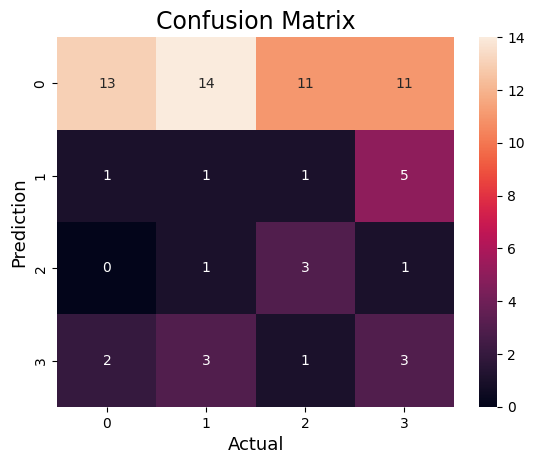

In [55]:
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [56]:
with open('emotion.pkl', 'wb') as f:
    pickle.dump(fit_models['lr'], f)

In [57]:
with open('emotion.pkl', 'rb') as f:
    model = pickle.load(f)

In [58]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [59]:
# run the above model in ur local machine, with CV2 so recognize emotions